Code Link : [Link](https://colab.research.google.com/drive/1L9ctdgt4ScGIKVIbw5yf3eYxd2WeveBT?usp=sharing
)

Importing Libraries


In [ ]:
#Importing Libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial

Generating DataSet


In [ ]:
mean = 0 #As e is given as a gaussin distribution 
def generate_dataset(stdev,size_of_data,no_independent_variable):

  X = np.random.randn(size_of_data,no_independent_variable+1)
  slope = np.random.randn(no_independent_variable+1,1)
  X[:,0] = 1 #Given 
  # Y = X*slope+e where e is gaussian dist 
  Y = (np.dot(X,slope)+np.random.normal(loc=mean,scale=stdev))

  return X,Y,slope

Manhattan Distance Function

In [ ]:
def manhattan_distance(x,y):
  return sum(abs(a-b) for a,b in zip(x,y))
#To measure the similarity between the predicted and origanle value
#Higher the distance lower the similarity and lower the distance higher the similarity
#So we can say in a way Manhattan distance is inversly proportional to similarity 

Linear Regression Function

In [ ]:
# X is array of independent variable
# Y is array of dependent variable
# epochs no. of epochs
# t threshold value 
def linear_regression(X,Y,epochs,threshold,step_size):
  size = np.shape(X[0])[0]
  B0 = np.zeros(shape=(size,1))
  cost_val = [0]
  Epoch_number = 0
  for i in range(epochs):
    diff = X.dot(B0)-Y
    gradient = X.T.dot(diff)/len(Y)
    B0 = B0 - step_size*gradient
    cst = cost_fuction(X,Y,B0)
    Epoch_number = Epoch_number + 1
    if abs(cost_val[-1]-cst)<threshold:
      break
    cost_val.append(cst)
  return B0,cost_val

In [ ]:
#Defining Cost Function
def cost_fuction(X,Y,B):
  n = len(Y)
  fxn = np.sum((pow(np.dot(X,B)-Y,2)/(2*n)))
  return fxn

In [ ]:
X,Y,B = generate_dataset(1,1000,10)
cost_val = []
B0,cost_val = linear_regression(X,Y,epochs=1000,threshold=0.001,step_size=0.01)
print("Variation of slope",end="\n\n")
B0 = pd.DataFrame(B0)
B0


Variation of slope



,0
0,-0.872803
1,-0.050293
2,-0.084143
3,1.094801
4,0.040840
5,0.261057
6,1.171476
7,-1.168586
8,0.154658
9,0.016169


In [ ]:
print("Cost Fuction Variation")
cost_val = pd.DataFrame(cost_val)
cost_val

Cost Fuction Variation


,0
0,0.000000
1,3.143996
2,3.082321
3,3.021879
4,2.962646
...,...
210,0.057738
211,0.056676
212,0.055634
213,0.054611


Changing value of n 

Manhattan Distance

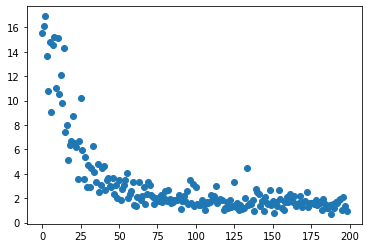

In [ ]:
arr = []
for i in range(1,200):
  X,Y,B = generate_dataset(1,i,20)
  cost_val = []
  Bp,cost_val = linear_regression(X,Y,epochs=500,threshold=0.001,step_size=0.04)
  arr.append(manhattan_distance(B,Bp))
b = np.arange(len(arr))
plt.scatter(b, arr)
plt.show()

As seen from the above graph with increase the total data points the manhattan distance is also getting decreased which means similarity between actual B and Predicted Bp is increasing as a result that directly implies that with increase in value of n our model is performing better as distance is getting low and low

Changing value of standard dev

Manhattan Distance

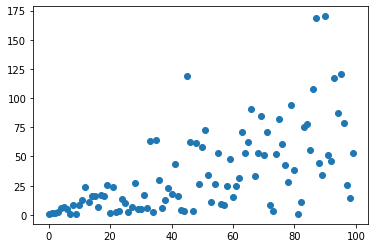

In [ ]:
ar = []
for i in range(0,100):
  X,Y,B = generate_dataset(i,200,20)
  cost_val = []
  Bp,cost_val = linear_regression(X,Y,epochs=500,threshold=0.001,step_size=0.04)
  ar.append(manhattan_distance(B,Bp))
b = np.arange(len(ar))
plt.scatter(b, ar)
plt.show()

As seen from the above graph with increase in standard deviation the manhattan distance is also getting increased and spead of data is also getting wider and wider so this is the estimate we can get from our graph 

Results:
1. Increasing the number of data points will provide us a better estimate of B from our model. Where number of parameter are constant

```
Y = X*B+e
where B is slope of that line 
e is a gaussian function
```


2. Increasing the standard deviation is reducing the similarity of actual and predicted value that results in decrement of accuracy of our Linear Regression Model. This will not provide a good estimate to the value B(Slope of Best Fit Line) and other paramters were kept constant in order to observe the result.